# Mentoría

## Aprendizaje Supervisado

### Introducción

En la siguiente notebook se presentará la consigna a seguir para el quinto y último práctico del proyecto, correspondiente a la materia Aprendizaje Automático No Supervisado. El objetivo consiste en aplicar distintas técnicas de análisis exploratorio de datos (EDA) al dataset, de modo de encontrar patrones sistematizables.

Luego, una vez aplicadas las técnicas de aprendizaje no supervisado y del cálculo de las métricas pertinentes, podremos recurrir a las etiquetas de clases con el fin de contrastar los resultados obtenidos.

Para ello, comenzaremos con las importaciones pertinentes.

### Importaciones

In [42]:
# Importación de las librerías necesarias
import numpy as np
import pandas as pd

# Puede que nos sirvan también
import matplotlib as mpl
mpl.get_cachedir()

import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

import seaborn as sns
# import sklearn as skl

from sklearn import preprocessing
from sklearn.utils import shuffle
from sklearn.decomposition.pca import PCA
from sklearn.decomposition import FactorAnalysis
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.model_selection import train_test_split
import plotly.graph_objs as go
random_state = 0
np.random.seed(0)  # Para mayor determinismo

pd.set_option('display.max_columns', 150)
pd.set_option('display.max_rows', 150)
pd.set_option('max_colwidth', 151)


##### Consigna para Aprendizaje Automático No Supervisado

### I. Preprocesamiento

A los fines de realizar este práctico, se utilizará el dataset original. A continuación se detallan los pasos a seguir para el preprocesamiento de los datos.

#### 1. Obtención del Dataset

Cargar el conjunto de entrenamiento original. Luego, eliminar las columnas calculadas en base a features preexistentes.

#### 2. Aplicar Script de Curación

Inicialmente, con el objetivo de preparar los datos que alimentarán los modelos de aprendizaje automático (ML) propuestos, deberán aplicar el script de curación obtenido en el segundo práctico. En esta etapa, nuevamente, pueden adicionar los atributos creados por ustedes que crean pertinentes a priori o que hayan encontrado interesantes por tener mayor correlación con la variable Kwatts_3_fases.

#### 3. Normalización de Atributos

Es posible que sea necesario normalizar las features de nuestro dataset, dado que los algoritmos de clasificación no supervisada lo requieren. Aplicar al dataset la normalización de atributos que consideren adecuada.

#### 4. Mezca Aleatória y División en Train/Test

Finalmente, es recomendable que mezclen los datos aleatoriamente, dado que la inicialización influye en los resultados del modelo que se propone que implementen.

Respecto a la división en Train/Test, dado que se trata de un algoritmo de aprendizaje automático no supervisado, pueden omitir esta división, ya que estamos buscando patrones ocultos en los datos que reflejen las causas latentes.


### II. Aplicación de Modelos de Aprendizaje Automático No Supervisado

Una vez finalizada la etapa de preprocesamiento, se propone implementar, por un lado, una técnica de reducción de dimensionalidad para representar los datos y, por el otro, una técnica de clusterización.

#### 1. Descomposición de Variables: Principal Component Analysis

Aplicar esta técnica de reducción de variables. A partir del análisis y la visualización de los datasets transformados por PCA, obtener conclusiones.

Adicionalmente, existe una técnica similar llamada Factor Analysis. Aplicarla y obtener conclusiones. Comparar con los resultados obtenidos previamente.

#### 2. K-Means Clustering

Aplicar K-Means tanto a los dataset originales como a los datasets transformados a partir de cualquiera de las técnicas anteriores.

Explorar distintas soluciones de clustering con diferentes parámetros, como iteraciones, número de clusters o métricas de distancia, y compararlas. Finalmente, para el modelo seleccionado:

    Calcular las métricas pertinentes sobre los clusters resultantes.
    Aplicando el método de Elbow, ¿cuál sería la cantidad óptima de clusters?
    Agregar a los dataset originales el cluster resultante de los modelos.
    Graficar diferentes variables de interés por cluster y por clase, y compararlos.
    Tomar ejemplos aleatorios y pensar por qué están en un cluster y no en otro.
    Calcular los centroides y tratar de mostrar qué tiene cada cluster cerca de su centroide. Obtener conclusiones.
    Contrastar la clasificación en clusters con los valores de potencia asociados en el dataset original.

### III. Opcional - Tareas Adicionales
Incluir clusters como una nueva feature en el modelo seleccionado en el práctico de aprendizaje supervisado.
Probar los modelos con los nuevos datos disponibilizados.

Obtener conclusiones de su aplicación.


### Entregables

El entregable de este práctico consiste en esta misma Notebook, pero con el preprocesamiento aplicado y las técnicas implementadas, agregando las explicaciones que crean pertinentes y las decisiones tomadas, en caso de corresponder.

## RESOLUCIÓN

### 1 . Preprocesamiento de los datos

#### 1.1 Cargamos dataset

In [43]:
#Parsing auxiliar
dateparse = lambda x: dt.datetime.strptime(x, '%Y-%m-%d %H:%M:%S')

_ds_energia = pd.read_csv('https://raw.githubusercontent.com/alaain04/diplodatos/master/data/energia_completo.csv')
_ds_energia['hora'] = _ds_energia.Fecha.apply(lambda x: x[11:13])
_ds_energia['Fecha'] = pd.to_datetime(_ds_energia['Fecha'],format='%Y-%m-%d %H:%M:%S')
_ds_energia.head(5)

,Fecha,Amper_fase_T_A,Amper_fase_S_A,Amper_fase_R_A,Vab,Vca,Vbc,Kwatts_3_fases,Factor_de_Poten_A,hora
0,2019-12-03 20:45:00,11,11,12,2147483.65,42.16,40.94,-2.147484e+09,0.00,20
1,2019-12-03 20:50:00,11,11,11,0.00,2147483.65,0.00,-2.147484e+09,0.00,20
2,2019-12-03 20:55:00,11,11,12,2147483.65,2147483.65,2147483.65,-2.147484e+09,-0.93,20
3,2019-12-03 21:00:00,11,11,11,2147483.65,0.00,2147483.65,0.000000e+00,0.00,21
4,2019-12-03 21:05:00,10,10,11,35.78,36.54,0.00,-4.342000e+03,-0.51,21


In [44]:
#Elimino datos del día 3/12/2019 para comenzar un dia completo
_ds_energia.drop(_ds_energia[pd.to_datetime(_ds_energia['Fecha'].dt.date)=='2019-12-03'].index,inplace=True)

#Generamos Period Index y ordenamos el dataset de Energia
_ds_energia.index = pd.PeriodIndex(list(_ds_energia['Fecha']), freq='05T')
_ds_energia = _ds_energia.sort_index()

In [45]:
# _ds_clima
_ds_clima = pd.read_csv('https://raw.githubusercontent.com/alaain04/diplodatos/master/data/clima_posadas_20192020.csv')
_ds_clima['time'] = pd.to_datetime(_ds_clima['time'],format='%Y-%m-%d %H:%M:%S')
#Elegimos features del dataset de Clima y los llevamos cada 5 minutos para poder unirlo con el dataset de energia
_ds_clima.index = pd.PeriodIndex(list(_ds_clima['time']), freq='T')
_ds_clima = _ds_clima[['temperature','windspeed','winddirection']].resample('05T').fillna("backfill")
#Ordenamos valores
_ds_clima = _ds_clima.sort_index()

In [46]:
_ds_energia=_ds_energia.join(_ds_clima,how='left')
_ds_energia.head()

,Fecha,Amper_fase_T_A,Amper_fase_S_A,Amper_fase_R_A,Vab,Vca,Vbc,Kwatts_3_fases,Factor_de_Poten_A,hora,temperature,windspeed,winddirection
2019-12-04 00:00,2019-12-04 00:00:00,9,9,10,2147483.65,2147483.65,2147483.65,-2.147484e+09,0.0,00,26.7,9.4,230.0
2019-12-04 00:05,2019-12-04 00:05:00,9,10,10,2147483.65,2147483.65,2147483.65,-2.147484e+09,0.0,00,25.8,9.4,140.0
2019-12-04 00:10,2019-12-04 00:10:00,9,9,10,2147483.65,2147483.65,2147483.65,-2.147484e+09,0.0,00,25.8,9.4,140.0
2019-12-04 00:15,2019-12-04 00:15:00,9,9,10,2147483.65,2147483.65,2147483.65,-2.147484e+09,0.0,00,25.8,9.4,140.0
2019-12-04 00:20,2019-12-04 00:20:00,9,9,10,2147483.65,2147483.65,2147483.65,-2.147484e+09,0.0,00,25.8,9.4,140.0


#### 1.2 Curación de datos

In [47]:
#Calculamos los valores absolutos de la Potencia
_ds_energia['abs_Kwatts'] = _ds_energia['Kwatts_3_fases'].abs()

#Calculamos los valores absolutos de la Potencia
_ds_energia['abs_Potencia'] = _ds_energia['Factor_de_Poten_A'].abs()

#Creamos un campo con la fecha del día solamente
_ds_energia['fecha_dia'] = pd.to_datetime(_ds_energia['Fecha'].dt.date) 

_ds_energia['DiaSemana'] = pd.to_datetime(_ds_energia.fecha_dia.dt.date).dt.day_name()
_ds_energia['mes_desc'] = pd.to_datetime(_ds_energia.fecha_dia.dt.date).dt.month_name()

In [48]:
def get_dia_laboral(nombre_dia):
    if nombre_dia in ['Wednesday', 'Thursday', 'Friday', 'Monday','Tuesday']:
        return 'Dia laboral'
    else:
        return 'Fin de semana'

In [49]:
_ds_energia['es_dia_laboral'] = _ds_energia['DiaSemana'].apply(lambda x:get_dia_laboral(x))

In [50]:
# instanciamos clases
le_dia_semana = preprocessing.LabelEncoder()
le_dia_laboral = preprocessing.LabelEncoder()

In [51]:
# Ejecutamos la funcion entrena el modelo de codificación
le_dia_semana.fit(_ds_energia['DiaSemana'])
le_dia_laboral.fit(_ds_energia['es_dia_laboral'])

LabelEncoder()

In [52]:
# View encoder mapping
dict(zip(le_dia_semana.classes_,le_dia_semana.transform(le_dia_semana.classes_)))

{'Friday': 0,
 'Monday': 1,
 'Saturday': 2,
 'Sunday': 3,
 'Thursday': 4,
 'Tuesday': 5,
 'Wednesday': 6}

In [53]:
dict(zip(le_dia_laboral.classes_,le_dia_laboral.transform(le_dia_laboral.classes_)))

{'Dia laboral': 0, 'Fin de semana': 1}

In [54]:
# transfomr -> ejecuta el modelo y retorna el array con los datos transformados

_ds_energia['DiaSemana_Transform'] = le_dia_semana.transform(_ds_energia['DiaSemana']) 
_ds_energia['Es_dia_laboral_Transform'] = le_dia_laboral.transform(_ds_energia['es_dia_laboral']) 

In [55]:
# obtengo lista de registros outliers
outl = _ds_energia[_ds_energia.abs_Kwatts > (_ds_energia.abs_Kwatts.median() + 3 * _ds_energia.abs_Kwatts.median())] 
_valor_outlier = _ds_energia.abs_Kwatts.median() + 3 * _ds_energia.abs_Kwatts.median()
print('Límite máximo de consumo para considerar outliers: ' + str(_valor_outlier) )

Límite máximo de consumo para considerar outliers: 14280.0


In [56]:
#Reemplazamos Nan en tensiones
_ds_energia.loc[ ( _ds_energia['Vab'].isna()), 'Vab'] = 0
_ds_energia.loc[ ( _ds_energia['Vca'].isna()), 'Vca'] = 0
_ds_energia.loc[ ( _ds_energia['Vbc'].isna()), 'Vbc'] = 0
#Reemplazamos outliers en tensiones
_ds_energia.loc[ ( _ds_energia['Vab'] > _ds_energia.Vab.median() + 3 * _ds_energia.Vab.median() ), 'Vab'] = 0 #_ds_energia.Vab.median() + 3 * _ds_energia.Vab.median()
_ds_energia.loc[ ( _ds_energia.Vca > _ds_energia.Vca.median() + 3 * _ds_energia.Vca.median() ) , 'Vca'] = 0 #_ds_energia.Vca.median() + 3 * _ds_energia.Vca.median()
_ds_energia.loc[ ( _ds_energia['Vbc'] > _ds_energia.Vbc.median() + 3 * _ds_energia.Vbc.median() ), 'Vbc'] = 0 #_ds_energia.Vbc.median() + 3 * _ds_energia.Vbc.median()

In [57]:
# convertimos los nan de abs_Kwatts en valor 0 si es nan 'Kwatts 3 fases' y 'Amper fase T-A'== 0, luego se marcará como un corte de energia
_ds_energia.loc[ ( _ds_energia['Amper_fase_R_A'].isna()) & (_ds_energia['Amper_fase_T_A'] == 0), 'Amper_fase_R_A'] = 0
_ds_energia.loc[ ( _ds_energia['Amper_fase_S_A'].isna()) & (_ds_energia['Amper_fase_T_A'] == 0), 'Amper_fase_S_A'] = 0
_ds_energia.loc[ ( _ds_energia['Kwatts_3_fases'].isna()) & (_ds_energia['Amper_fase_T_A'] == 0), 'abs_Kwatts'] = 0

#### 1.2.1 Se considera CORTE ENERGIA si no hay TENSIÓN o CORRIENTE

*Esto cambia el balanceo de las clases de un 90-10 a un 53-47*

In [58]:
#Evaluamos si hubo un corte de energia (o sea, si la potencia total es igual a 0)
_ds_energia.loc[_ds_energia.abs_Kwatts == 0, 'corte_energia'] = 1
_ds_energia.loc[(_ds_energia['Factor_de_Poten_A']<=0) & (_ds_energia['Kwatts_3_fases']>0),
                                               'corte_energia'] = 1
_ds_energia.loc[(_ds_energia['Factor_de_Poten_A']>0) & (_ds_energia['Kwatts_3_fases']<0),
                                               'corte_energia'] = 1                                               

_ds_energia.loc[_ds_energia.abs_Kwatts != 0, 'corte_energia'] = 0

_ds_energia.loc[_ds_energia.Vca == 0, 'corte_energia'] = 1
_ds_energia.loc[_ds_energia.Vab == 0, 'corte_energia'] = 1
_ds_energia.loc[_ds_energia.Vbc == 0, 'corte_energia'] = 1

_ds_energia.loc[_ds_energia['Amper_fase_R_A'] == 0, 'corte_energia'] = 1
_ds_energia.loc[_ds_energia['Amper_fase_T_A'] == 0, 'corte_energia'] = 1
_ds_energia.loc[_ds_energia['Amper_fase_S_A'] == 0, 'corte_energia'] = 1


#Cambiamos outliers sólo en columna nueva
#Evaluamos si hay los outliers de la potencia
_ds_energia.loc[_ds_energia.abs_Kwatts > _valor_outlier, 'outlier_Kwatts'] = 1
_ds_energia.loc[_ds_energia.abs_Kwatts <= _valor_outlier, 'outlier_Kwatts'] = 0


#Decidimos reemplazar los valores outliers de Potencia por 0 ya que consideramos que 
#fue un error de medición y que para poder graficar los datos, necesitamos que no estén.
_ds_energia.loc[_ds_energia['outlier_Kwatts']==1, 'abs_Kwatts'] = 0

_ds_energia.abs_Kwatts.fillna(value=0,inplace=True)
_ds_energia.abs_Potencia.fillna(value=0, inplace=True)
_ds_energia.winddirection.fillna(value=0,inplace=True)
_ds_energia.windspeed.fillna(value=0,inplace=True)


In [59]:
#Verifico Nan
_ds_energia[_ds_energia.abs_Kwatts.isna()==True].abs_Kwatts.count()

0

In [60]:
#Verifico Nan
_ds_energia[_ds_energia.abs_Potencia.isna()==True].abs_Potencia.count()

0

#### 1.2.2 Creamos la etiqueta de las clases en la columna TARGET con valor 0 para potencia menor a 100kw o indicador "corte_energia =1" y valor 1 para el resto

In [61]:
#Creamos la columna target seteando un 1 suponiendo que hay energia, para luego evaluar la columna de potencia y asignarle 0 en caso contrario
_ds_energia['target'] = 1
_ds_energia.loc[_ds_energia.abs_Kwatts <= 100, 'target'] = 0
_ds_energia.loc[_ds_energia.corte_energia==1, 'target'] = 0


In [62]:
print('Porcentaje de valor 1 (con distribución de energia) ' + str(_ds_energia[_ds_energia.target==1].Fecha.count()/_ds_energia.Fecha.count()))
print('Porcentaje de valor 0 (sin distribución de energia) ' + str(_ds_energia[_ds_energia.target==0].Fecha.count()/_ds_energia.Fecha.count()))

Porcentaje de valor 1 (con distribución de energia) 0.5311325654578228
Porcentaje de valor 0 (sin distribución de energia) 0.46886743454217716


##### Funciones de normalizacion de datos

In [63]:
#Funcion para normalizar los campos numéricos de 0 a 1
def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

In [64]:
#Funcion para normalizar los campos numéricos de -1 a 1
def normalize_alternativa(df):
    result = df.copy()
    for feature_name in df.columns:
        if feature_name != 'target':
            _mean = df[feature_name].mean()
            _std = df[feature_name].std()
            result[feature_name] = (df[feature_name] - _mean) / (_std)
    return result

In [65]:
#dt_normalizado = normalize_alternativa(_ds_energia.drop(columns=['Kwatts_3_fases','Factor_de_Poten_A','outlier_Kwatts','corte_energia','es_dia_laboral','mes_desc','DiaSemana','fecha_dia','hora','Fecha']))
#dt_normalizado.sample(5)

*Para ver como se ven los datos con normalización de media 0 y std 1

In [66]:
#dt_normalizado_alternativa = normalize_alternativa(_ds_energia.drop(columns=['Kwatts_3_fases','Factor_de_Poten_A','outlier_Kwatts','corte_energia','es_dia_laboral','mes_desc','DiaSemana','fecha_dia','hora','Fecha']))
#dt_normalizado_alternativa.sample(3)

### 2 . Modelos de Aprendizaje No Supervisado

##### Resguardamos las columnas con valores categóricos, para poder utilizarlos en un análisis posterior

In [67]:
_ds_energia.columns

Index(['Fecha', 'Amper_fase_T_A', 'Amper_fase_S_A', 'Amper_fase_R_A', 'Vab',
       'Vca', 'Vbc', 'Kwatts_3_fases', 'Factor_de_Poten_A', 'hora',
       'temperature', 'windspeed', 'winddirection', 'abs_Kwatts',
       'abs_Potencia', 'fecha_dia', 'DiaSemana', 'mes_desc', 'es_dia_laboral',
       'DiaSemana_Transform', 'Es_dia_laboral_Transform', 'corte_energia',
       'outlier_Kwatts', 'target'],
      dtype='object')

In [68]:
_ds_categoricas = _ds_energia[['Fecha', 'hora', 'fecha_dia', 'DiaSemana', 'mes_desc', 'es_dia_laboral',]]
_ds_categoricas

,Fecha,hora,fecha_dia,DiaSemana,mes_desc,es_dia_laboral
2019-12-04 00:00,2019-12-04 00:00:00,00,2019-12-04,Wednesday,December,Dia laboral
2019-12-04 00:05,2019-12-04 00:05:00,00,2019-12-04,Wednesday,December,Dia laboral
2019-12-04 00:10,2019-12-04 00:10:00,00,2019-12-04,Wednesday,December,Dia laboral
2019-12-04 00:15,2019-12-04 00:15:00,00,2019-12-04,Wednesday,December,Dia laboral
2019-12-04 00:20,2019-12-04 00:20:00,00,2019-12-04,Wednesday,December,Dia laboral
...,...,...,...,...,...,...
2020-08-02 20:15,2020-08-02 20:15:00,20,2020-08-02,Sunday,August,Fin de semana
2020-08-02 20:20,2020-08-02 20:20:00,20,2020-08-02,Sunday,August,Fin de semana
2020-08-02 20:25,2020-08-02 20:25:00,20,2020-08-02,Sunday,August,Fin de semana
2020-08-02 20:30,2020-08-02 20:30:00,20,2020-08-02,Sunday,August,Fin de semana


Quitamos del dataset las columnas que no se usarán para el modelo

In [69]:
_ds_energia.drop(['Fecha', 'hora', 'fecha_dia', 'DiaSemana', 'mes_desc', 'es_dia_laboral', 
                  'Kwatts_3_fases', 'Factor_de_Poten_A','outlier_Kwatts'], axis=1,inplace=True)

#### 2.1 Descomposición de componentes principales (PCA)

##### Normalizado de los datos

In [70]:
dt_normalizado = normalize_alternativa(_ds_energia)
dt_normalizado.sample(3)

,Amper_fase_T_A,Amper_fase_S_A,Amper_fase_R_A,Vab,Vca,Vbc,temperature,windspeed,winddirection,abs_Kwatts,abs_Potencia,DiaSemana_Transform,Es_dia_laboral_Transform,corte_energia,target
2019-12-28 21:15,-1.072020,-1.059693,-1.044833,0.343498,0.333273,0.341026,1.783391,-1.988626,-1.559265,1.966853,0.204616,-0.498946,1.582811,1.066316,0
2020-04-26 21:20,-1.072020,-1.059693,-1.044833,0.580177,0.600983,0.594084,0.046631,0.218122,-0.037174,0.589659,0.456635,0.000160,1.582811,1.066316,0
2020-02-04 05:50,-0.313583,-0.351038,-0.381436,0.596662,0.606691,0.508949,0.458744,-1.633970,-0.580778,0.959926,0.348627,0.998372,-0.631778,-0.937794,1


In [71]:
from sklearn.decomposition import PCA

pca=PCA(n_components=5) 

pca.fit(np.array(dt_normalizado)) 

# proporción de varianza
print('Proporción de varianza por componente: ', pca.explained_variance_ratio_)

# proporción de varianza acumulada
print ('Proporción de varianza por componente acumulada: ', pca.explained_variance_ratio_.cumsum())

X_projected=pca.transform(np.array(dt_normalizado)) #numpy array
print ('Tamaño de los datos: ', X_projected.shape)

Proporción de varianza por componente:  [0.37900062 0.17358372 0.090523   0.08698892 0.07800277]
Proporción de varianza por componente acumulada:  [0.37900062 0.55258434 0.64310733 0.73009626 0.80809903]
Tamaño de los datos:  (65462, 5)


**Con 5 componentes explicamos el 80% de los datos del dataset**

Graficamos un los puntos de las dos primeras componentes

In [72]:
pca.components_.shape

(5, 15)

In [73]:
pca_X = pca.components_[0,:]
pca_Y = pca.components_[1,:]

In [74]:
pca_X

array([ 0.3303846 ,  0.33412788,  0.33383771,  0.34695167,  0.34504043,
        0.34617545, -0.22273248,  0.04043794, -0.01775615,  0.15161292,
        0.25028156, -0.02809394,  0.02669178, -0.36863153,  0.18415382])

In [75]:
pca_Y

array([-0.38659175, -0.38214515, -0.38179875,  0.32359946,  0.32847784,
        0.32562327,  0.05438542, -0.07286979, -0.0138037 ,  0.30306357,
        0.32908628, -0.02113848,  0.04069169,  0.15354786, -0.07624687])

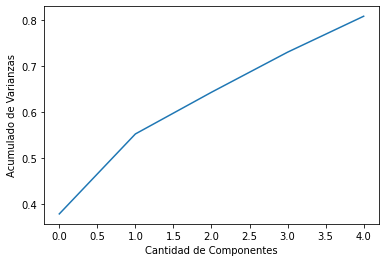

In [76]:
#graficamos el acumulado de varianza explicada en las nuevas dimensiones
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Cantidad de Componentes')
plt.ylabel('Acumulado de Varianzas')
plt.show()

Text(0, 0.5, 'Componente 2')

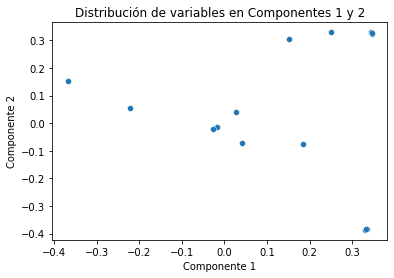

In [77]:
sns.scatterplot(x=pca_X, y=pca_Y)
plt.title("Distribución de variables en Componentes 1 y 2")
plt.xlabel("Componente 1")
plt.ylabel("Componente 2")

In [78]:
pcs=pca.components_
data=[]
for i, (x,y) in enumerate(zip(pcs[0,:],pcs[1,:])):
    graph=go.Scatter(x=[0,x],y=[0,y],text=dt_normalizado.columns[i],
                     mode='lines+markers+text',textposition='top left',textfont=dict(family='sans serif',size=15))
    data.append(graph)

layout = go.Layout(title="PCA - Correlación entre variables y componentes",titlefont=dict(size=20),
            xaxis=dict(title='Componente 1'),
            yaxis=dict(title='Componente 2'),
            autosize=False, width=850,height=550,
            showlegend=False)

fig = go.Figure(data=data, layout=layout)

#plot(fig)
fig.show(renderer="colab")

Este gráfico nos permite ver las variables que más correlacionadas (las que figuran más cercas unas de otras) y las menos correlacionadas (las que están en líneas opuestas entre sí). Podemos observar que la potencia y las tensiones están muy relacionadas, mientras que están algo relacionadas con features como la corriente. La variable "target" la vemos entre estas últimas, indicando que son las que más "pesan" a la hora de determinar si hay o no servicio eléctrico.
Por último, vemos que corte_energia es opuesta a target.

#### 2.2 Factor Analysis


In [79]:
_fa = FactorAnalysis(n_components=5)

In [80]:
_fa.fit_transform(np.array(dt_normalizado))

/usr/local/lib/python3.6/dist-packages/sklearn/decomposition/_factor_analysis.py:242: ConvergenceWarning:

FactorAnalysis did not converge. You might want to increase the number of iterations.



array([[-1.05198182,  1.44389239, -0.24824199, -1.80217177,  1.21525975],
       [-1.03391335,  1.45922852, -0.21829412, -1.80639551,  0.99815403],
       [-1.05194805,  1.4438582 , -0.24801025, -1.80408211,  1.09400609],
       ...,
       [ 1.45782658,  0.57531748,  0.58563283,  0.05007465, -0.07037252],
       [ 1.4752232 ,  0.58654791,  0.61781642,  0.08972993,  0.06530211],
       [ 1.47016106,  0.57913902,  0.61013329,  0.01545304, -0.1083219 ]])

### Clustering K-means

#### Grafico de codo o inercia

In [81]:
scores = [KMeans(n_clusters=i+2).fit(np.array(dt_normalizado)).inertia_ for i in range(10)]

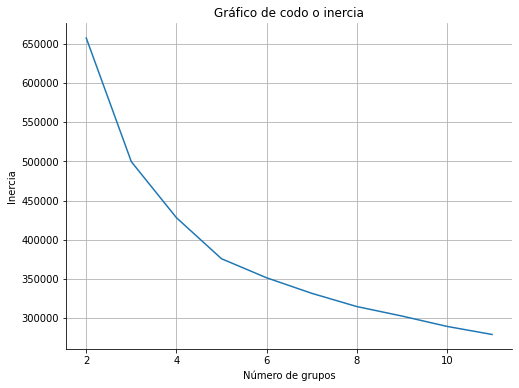

In [82]:
plt.figure(figsize=(8,6))

plt.plot(np.arange(2, 12), scores)
plt.xlabel('Número de grupos')
plt.ylabel("Inercia")

plt.title('Gráfico de codo o inercia')

plt.grid()
sns.despine()
plt.show()

**4 grupos es la cantidad óptima. 5 o más grupos no aportan tanta variación**

For n_clusters = 2 The average silhouette_score is : 0.27859216816282484
For n_clusters = 3 The average silhouette_score is : 0.28589487463432767
For n_clusters = 4 The average silhouette_score is : 0.305093118291251
For n_clusters = 5 The average silhouette_score is : 0.27399894403938707
For n_clusters = 6 The average silhouette_score is : 0.26577231503603443


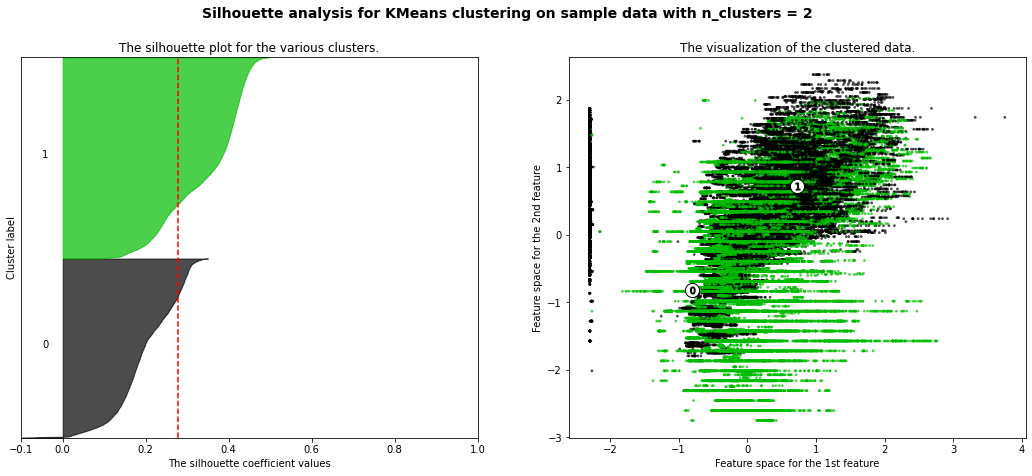

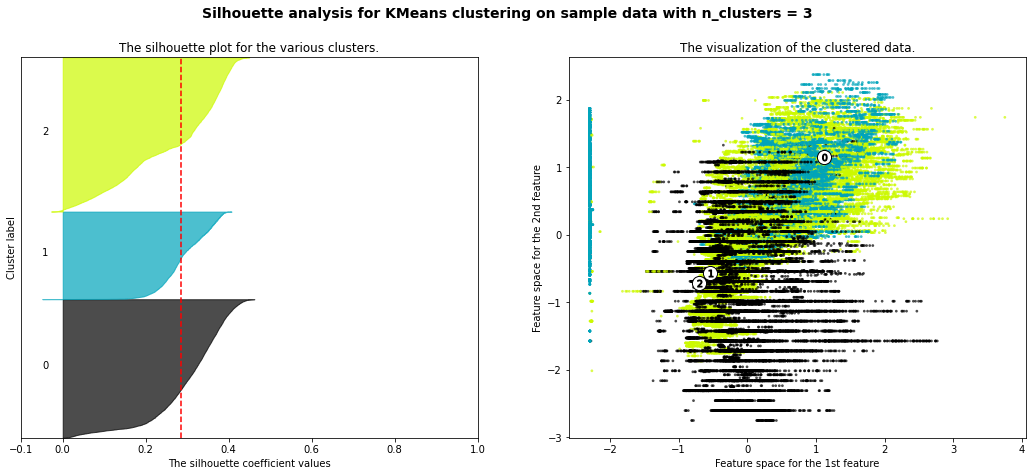

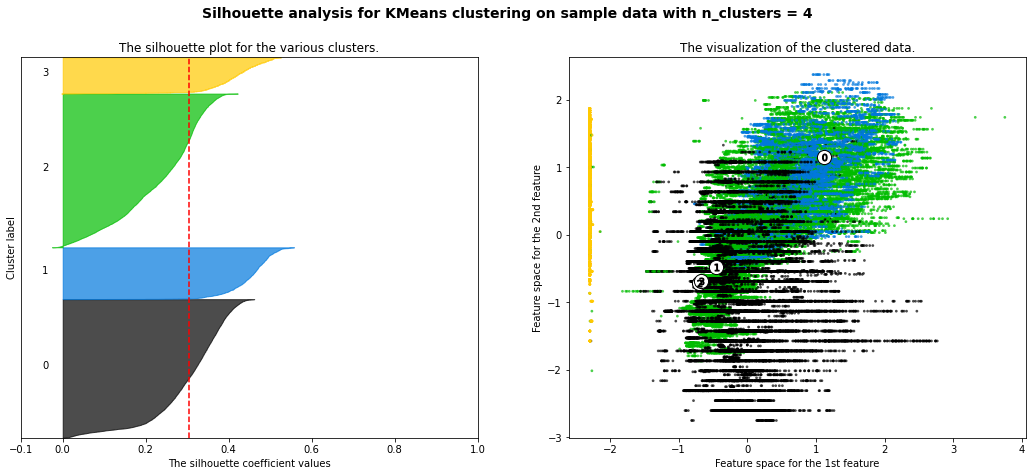

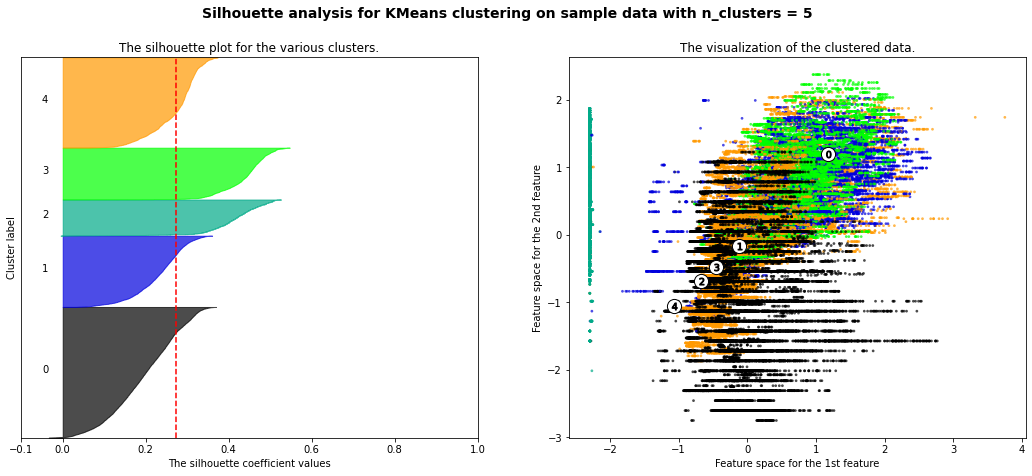

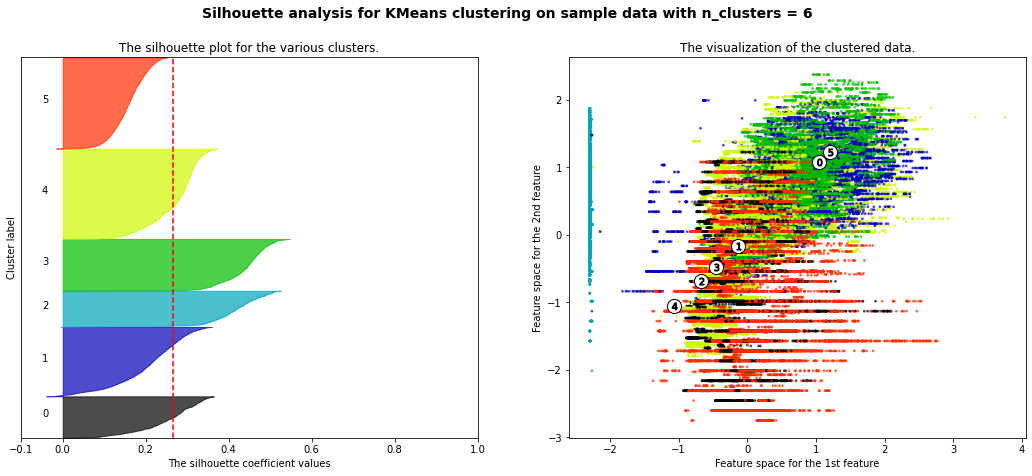

In [83]:
range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(np.array(dt_normalizado)) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(np.array(dt_normalizado))

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(np.array(dt_normalizado), cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(np.array(dt_normalizado), cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    
    ax2.scatter(np.array(dt_normalizado)[:,9], np.array(dt_normalizado)[:, 6], 
                marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')


    # Labeling the clusters
    centers = clusterer.cluster_centers_

    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

#### Utilizando 4 grupos agregamos las etiquetas de los grupos al dataset

In [84]:
k = 4
km = KMeans(n_clusters=k)
km.fit(dt_normalizado)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

Agrego columna "k_grupos"

In [85]:
_ds_energia["k_grupos"] = km.labels_

In [86]:
_ds_energia.sample(5)[['k_grupos','Amper_fase_T_A','abs_Kwatts','abs_Potencia']]

,k_grupos,Amper_fase_T_A,abs_Kwatts,abs_Potencia
2019-12-22 15:30,1,23,2887.0,0.92
2020-03-11 09:00,3,0,3574.0,0.89
2020-07-07 20:50,0,67,6295.0,0.98
2020-04-14 03:30,1,0,2145.0,0.98
2020-05-11 16:45,0,40,2621.0,0.96


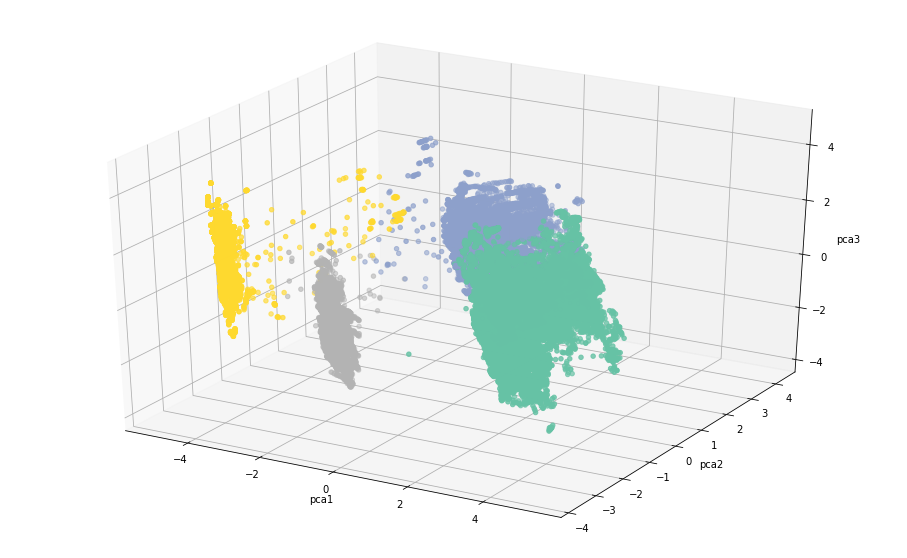

In [87]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=X_projected[:,0], 
    ys=X_projected[:,1], 
    zs=X_projected[:,2],
    c=_ds_energia.k_grupos,
    cmap='Set2'
)
ax.set_xlabel('pca1')
ax.set_ylabel('pca2')
ax.set_zlabel('pca3')
plt.show()

#### Graficar diferentes variables de interés por cluster y por clase, y compararlos.
Grafico los grupos segun 2 columnas

In [ ]:
from bokeh.models import ColorBar, ColumnDataSource
from bokeh.palettes import Spectral6
from bokeh.plotting import figure, output_file, show
from bokeh.transform import linear_cmap
import bokeh.layouts
import bokeh.plotting
from bokeh.io import output_notebook

# Call once to configure Bokeh to display plots inline in the notebook.
output_notebook()

var_interes = ['abs_Kwatts', 'abs_Potencia','target']

In [ ]:
x = np.array(_ds_energia.abs_Kwatts)
y = np.array(_ds_energia.temperature)

c =  np.array(_ds_energia.k_grupos)
g = np.array(_ds_energia.k_grupos)

#Use the field name of the column source
mapper = linear_cmap(field_name='y', palette=Spectral6 ,low=min(c +5) ,high=max(c))


colors = np.array([x for x in ('black', 'green', 'blue', 'red', 'gray')])
colors = np.hstack([colors])

source = ColumnDataSource(dict(x=x,y=y, colores=colors[c].tolist(), 
                               grupos= np.array(_ds_energia.k_grupos) ))


In [ ]:
p = figure(plot_width=600, plot_height=600, 
           title="Grupos K-means",
           x_axis_label= 'abs_Kwatts',
           y_axis_label = 'temperature')

p.circle(x='x', y='y', line_color='colores',  color='colores' , 
         fill_alpha=1, size=3, 
         source=source, legend_group='grupos')

p.legend.title= 'Grupos'
p.title.align = 'center'

show(p)

Output hidden; open in https://colab.research.google.com to view.

En el gráfico anterior, donde analizamos los grupos en relación a la temperatura y potencia, vemos claramente uno de los grupos que contiene los cortes de energía (dado que abs_Kwatts=0).


In [ ]:
#Contabilizamos las cantidades de registros de acuerdo a la variable target y los clusters encontrados.
pd.crosstab(_ds_energia.target,_ds_energia.k_grupos)

k_grupos,0,1,2,3
target,,,,
0,1,15551,6229,8912
1,23824,10945,0,0


In [ ]:
#ver variables de interes por grupo

_ds_energia.pivot( columns='k_grupos', values=['abs_Kwatts', 'abs_Potencia','target']).describe().T

count         mean          std    min      25%  \
             k_grupos                                                      
abs_Kwatts   0         23825.0  3134.014648   784.893446  24.00  2588.00   
             1         26496.0  3845.982526  1049.167004   0.00  3015.00   
             2          6229.0     5.139990   131.771806   0.00     0.00   
             3          8912.0  4015.874663   861.357737   0.00  3396.00   
abs_Potencia 0         23825.0     0.931973     0.062957   0.55     0.90   
             1         26496.0     0.931648     0.055824   0.00     0.91   
             2          6229.0     0.003794     0.039045   0.00     0.00   
             3          8912.0     0.929369     0.038985   0.00     0.91   
target       0         23825.0     0.999958     0.006479   0.00     1.00   
             1         26496.0     0.413081     0.492396   0.00     0.00   
             2          6229.0     0.000000     0.000000   0.00     0.00   
             3          8912.0     0.000000     0.000000   0.00     0.00   

                           50%      75%      max  
             k_grupos                             
abs_Kwatts   0         2966.00  3587.00  7161.00  
             1         3753.00  4543.00  8553.00  
             2            0.00     0.00  4338.00  
             3         3922.50  4582.00  6413.00  
abs_Potencia 0            0.96     0.98     0.99  
             1            0.94     0.96     0.99  
             2            0.00     0.00     0.92  
             3            0.93     0.96     0.98  
target       0            1.00     1.00     1.00  
             1            0.00     1.00     1.00  
             2            0.00     0.00     0.00  
             3            0.00     0.00     0.00

Al contabilizar los registros que tiene cada clusters según la variable target, vemos que 2 de ellos contienen únicamente datos donde no hubo energía, uno donde siempre la hubo y el último donde fue ambivalente la variable.
Si analizamos los resultados de la tabla + el gráfico, podemos observar que los grupos con cortes de energía, poseen temperaturas más altas que el grupo donde no hay cortes. Esto puede deberse al periodo de tiempo donde se registraron la mayor cantidad de cortes (Diciembre y Enero), que es pleno verano y existieron altas temperaturas.
El grupo que no contiene cortes de energía presenta datos de temperatura mucho más homogéneos al igual que los de corriente.


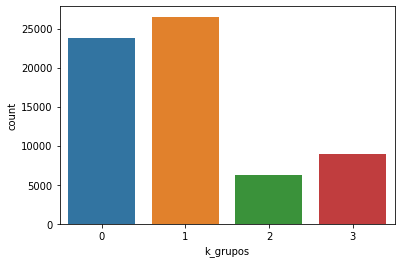

In [ ]:
#Cantidades de registros por clusters
sns.countplot(data=_ds_energia, x=_ds_energia.k_grupos)

### PCA + Kmeans

In [ ]:
pca_model=PCA(n_components=0.95) #la cantidad de componentes que expliquen el 95% de la varianza 
pca=pca_model.fit_transform(dt_normalizado) #input data is centered but not scaled for each feature before applying the SVD

# proporción de varianza
print('proporción de varianza por componente: ', pca_model.explained_variance_ratio_)
# proporción de varianza acumulada
print ('proporción de varianza por componente acumulada: ', pca_model.explained_variance_ratio_.cumsum())

X_projected=pca_model.transform(np.array(dt_normalizado)) #numpy array

print ('tamaño de los datos: ', pca.shape)

proporción de varianza por componente:  [0.37900062 0.17358372 0.090523   0.08698892 0.07800277 0.0595504
 0.05600401 0.04628484]
proporción de varianza por componente acumulada:  [0.37900062 0.55258434 0.64310733 0.73009626 0.80809903 0.86764943
 0.92365344 0.96993828]
tamaño de los datos:  (65462, 8)


Necesitamos 8 componentes para lograr el 95% de la varianza

In [ ]:
def myplot(score,coeff,groups,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.figure(figsize=(20,10)) 
    plt.scatter(xs * scalex,ys * scaley,s=5, c=groups, cmap='Set2' )
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'black', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'black', ha = 'center', va = 'center')
 

    plt.legend(groups)
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()

Text(0.5, 1.0, 'Inertia of k-Means versus number of clusters')

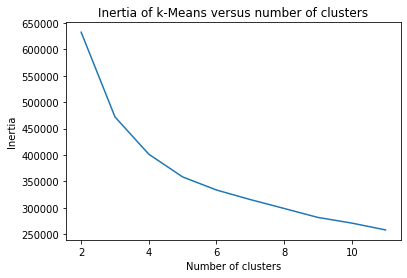

In [ ]:
scores = [KMeans(n_clusters=i+2).fit(X_projected).inertia_ for i in range(10)]

from matplotlib import pyplot as plt
plt.plot(np.arange(2, 12), scores)
plt.xlabel('Number of clusters')
plt.ylabel("Inertia")
plt.title("Inertia of k-Means versus number of clusters")

In [ ]:
k = 3
km_pca = KMeans(n_clusters=k)
km_pca.fit(X_projected)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
_ds_energia["kpca_grupos"] = km_pca.labels_

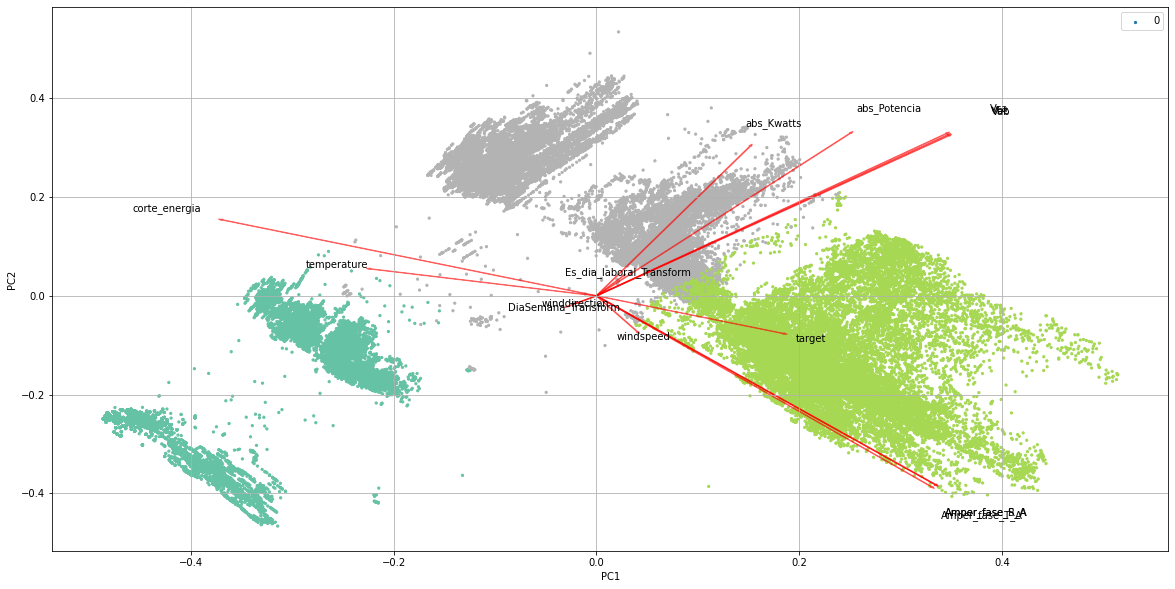

In [ ]:
myplot(pca[:,0:2],np.transpose(pca_model.components_[0:2, :]),km_pca.labels_,list(dt_normalizado.columns))
plt.show()

In [ ]:
x = np.array(_ds_energia.abs_Kwatts)
#y = np.array(_ds_energia.temperature)
y = np.array(_ds_energia.Vab)

c =  np.array(_ds_energia.kpca_grupos)
g = np.array(_ds_energia.kpca_grupos)

#Use the field name of the column source
mapper = linear_cmap(field_name='y', palette=Spectral6 ,low=min(c +5) ,high=max(c))


colors = np.array([x for x in ('black', 'green', 'blue')])
colors = np.hstack([colors])

source = ColumnDataSource(dict(x=x,y=y, colores=colors[c].tolist(), 
                               grupos= np.array(_ds_energia.kpca_grupos) ))
p = figure(plot_width=600, plot_height=600, 
           title="Grupos K-means+PCA",
           x_axis_label= 'abs_Kwatts',
           y_axis_label = 'Vab')

p.circle(x='x', y='y', line_color='colores',  color='colores' , 
         fill_alpha=1, size=3, 
         source=source, legend_group='grupos')

p.legend.title= 'Grupos'
p.title.align = 'center'

show(p)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
_ds_energia.pivot( columns='kpca_grupos', values=['abs_Kwatts', 'abs_Potencia','Vab','target']).describe().T

count         mean          std    min      25%  \
             kpca_grupos                                                      
abs_Kwatts   0            15074.0  2376.531710  2081.879326   0.00     0.00   
             1            23969.0  3138.184321   787.349863  24.00  2590.00   
             2            26419.0  3836.237746  1066.317814   0.00  3008.00   
abs_Potencia 0            15074.0     0.551094     0.456868   0.00     0.00   
             1            23969.0     0.931798     0.062847   0.55     0.90   
             2            26419.0     0.929404     0.072463   0.00     0.91   
Vab          0            15074.0     0.115473     1.841345   0.00     0.00   
             1            23969.0    39.328332     5.991417  31.10    35.72   
             2            26419.0    38.280052     4.825033   0.00    35.33   
target       0            15074.0     0.000000     0.000000   0.00     0.00   
             1            23969.0     0.999958     0.006459   0.00     1.00   
             2            26419.0     0.408835     0.491628   0.00     0.00   

                              50%      75%      max  
             kpca_grupos                             
abs_Kwatts   0            3114.50  4108.00  6413.00  
             1            2969.00  3594.00  7161.00  
             2            3750.00  4540.50  8553.00  
abs_Potencia 0               0.89     0.94     0.98  
             1               0.96     0.98     0.99  
             2               0.94     0.96     0.99  
Vab          0               0.00     0.00    49.06  
             1              36.41    40.12    56.88  
             2              36.09    39.41    56.56  
target       0               0.00     0.00     0.00  
             1               1.00     1.00     1.00  
             2               0.00     1.00     1.00

In [ ]:
pd.crosstab(_ds_energia.k_grupos,_ds_energia.kpca_grupos)

kpca_grupos,0,1,2
k_grupos,,,
0,8,125,26343
1,6155,0,74
2,0,23844,1
3,8911,0,1


#### Tomar ejemplos aleatorios y pensar por qué están en un cluster y no en otro.

Seleccionamos un clusters que contiene casos donde hubo energía y donde no hubo.


In [ ]:
_ds_energia[_ds_energia.kpca_grupos==2].sample(10)

,Amper_fase_T_A,Amper_fase_S_A,Amper_fase_R_A,Vab,Vca,Vbc,temperature,windspeed,winddirection,abs_Kwatts,abs_Potencia,DiaSemana_Transform,Es_dia_laboral_Transform,corte_energia,target,k_grupos,kpca_grupos
2020-01-30 14:20,0,0,0,34.77,37.03,35.86,26.0,7.6,180.0,3144.0,0.92,4,0,1.0,0,0,2
2020-04-23 09:50,0,0,0,35.19,37.45,36.29,17.1,7.6,110.0,2442.0,0.96,4,0,1.0,0,0,2
2019-12-12 00:20,9,9,10,37.64,38.80,37.92,29.0,7.6,20.0,5527.0,0.92,4,0,0.0,1,0,2
2019-12-31 07:20,0,0,0,35.95,37.11,36.06,26.2,5.4,160.0,4240.0,0.92,5,0,1.0,0,0,2
2020-01-30 00:05,0,0,0,48.24,47.03,44.73,22.9,14.8,50.0,4786.0,0.96,4,0,1.0,0,0,2
2020-04-03 05:40,0,0,0,36.57,39.24,38.05,12.7,7.6,250.0,2417.0,0.98,0,0,1.0,0,0,2
2020-01-12 21:20,0,0,0,35.09,36.03,35.45,32.6,11.2,140.0,5130.0,0.91,3,1,1.0,0,0,2
2019-12-18 20:55,12,12,12,35.54,36.52,35.82,30.6,5.4,160.0,4796.0,0.91,6,0,0.0,1,0,2
2020-04-13 15:55,0,0,0,36.79,39.02,37.87,29.0,9.4,50.0,2989.0,0.93,1,0,1.0,0,0,2
2020-02-24 10:20,25,26,26,35.39,37.73,36.39,22.9,3.6,360.0,2871.0,0.93,1,0,0.0,1,0,2


Lo único en común que podemos ver en este sample, es que las tensiones están en un rango entre 35 y 45. El resto de las variables tienen mucha variación.

#### Calcular los centroides y tratar de mostrar qué tiene cada cluster cerca de su centroide. Obtener conclusiones.

In [ ]:
centroide_km=pd.DataFrame(data=km.cluster_centers_, columns=dt_normalizado.columns)

centroide_km[var_interes]

,abs_Kwatts,abs_Potencia,target
0,0.425042,0.318569,4.129261e-01
1,-2.288994,-3.021979,-9.325873e-15
2,-0.077975,0.319715,9.999580e-01
3,0.545054,0.310354,2.009504e-14


#### Contrastar la clasificación en clusters con los valores de potencia asociados en el dataset original.